1.Vader
2.Roberta

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##1.Importing packages and Reading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
df=pd.read_csv('/content/drive/MyDrive/sentiment/Reviews.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
print(df.shape)
df=df.head(1000)
print(df.shape)

(568454, 10)
(1000, 10)


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##2.Overview of first 1000 reviews

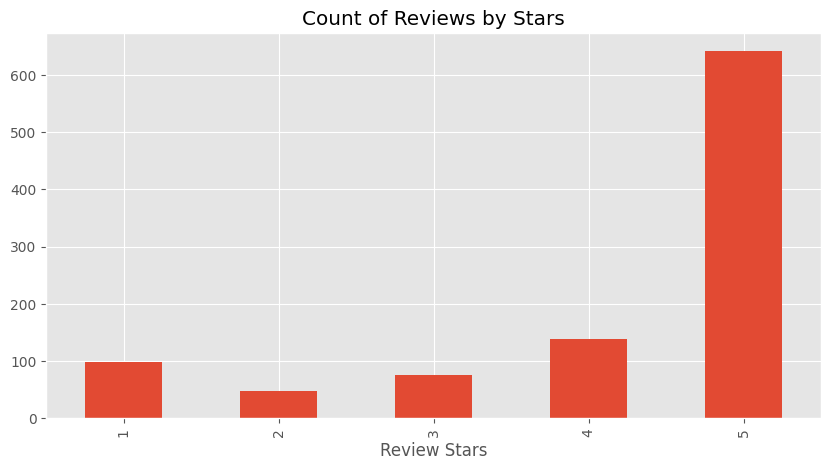

Count of Reviews  by stars
1     98
2     47
3     75
4    138
5    642
Name: Score, dtype: int64


In [ ]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()
print("Count of Reviews  by stars")
print(df['Score'].value_counts().sort_index())

In [ ]:
example=df['Text'][42]
print(example)

I have McCann's Oatmeal every morning and by ordering it from Amazon I am able to save almost $3.00 per box.<br />It is a great product. Tastes great and very healthy


In [ ]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['I',
 'have',
 'McCann',
 "'s",
 'Oatmeal',
 'every',
 'morning',
 'and',
 'by',
 'ordering']

In [ ]:
# Part of speech
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('have', 'VBP'),
 ('McCann', 'NNP'),
 ("'s", 'POS'),
 ('Oatmeal', 'NNP'),
 ('every', 'DT'),
 ('morning', 'NN'),
 ('and', 'CC'),
 ('by', 'IN'),
 ('ordering', 'VBG')]

In [ ]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  have/VBP
  (PERSON McCann/NNP)
  's/POS
  Oatmeal/NNP
  every/DT
  morning/NN
  and/CC
  by/IN
  ordering/VBG
  it/PRP
  from/IN
  (GPE Amazon/NNP)
  I/PRP
  am/VBP
  able/JJ
  to/TO
  save/VB
  almost/RB
  $/$
  3.00/CD
  per/IN
  box./NN
  </NN
  br/NN
  //NNP
  >/NN
  It/PRP
  is/VBZ
  a/DT
  great/JJ
  product/NN
  ./.
  Tastes/VBZ
  great/JJ
  and/CC
  very/RB
  healthy/JJ)


##3.Sentiment Analysis using VADER

In [ ]:
 from nltk.sentiment import SentimentIntensityAnalyzer
 from tqdm.notebook import tqdm #Progress bar

 sia=SentimentIntensityAnalyzer()


In [ ]:
sia.polarity_scores('I am happy!')

{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound': 0.6114}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.9441}

In [ ]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)
    

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [ ]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [ ]:
    vaders.head() #sentiment score and metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


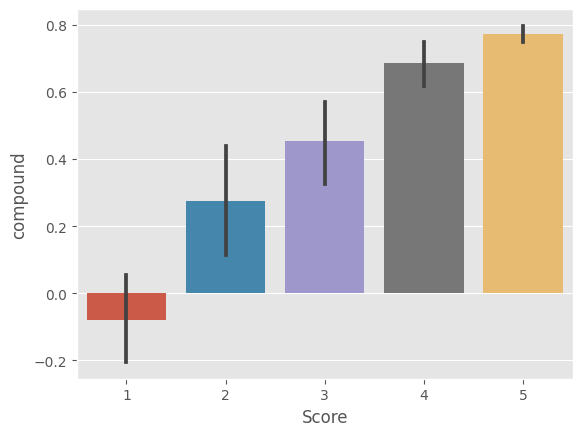

In [ ]:
# Plotting Vader results
sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compund Store by Amazon Star Review')
plt.show()

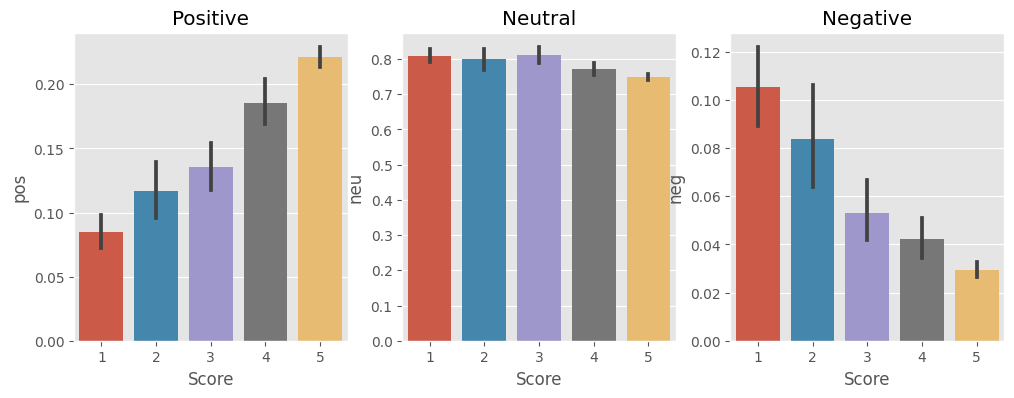

In [ ]:
fig,axs=plt.subplots(1,3,figsize=(12,4))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

## 4.Roberta

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.9 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

##5.Comparison b/w vader and roberta

In [ ]:
print(example)
sia.polarity_scores(example)

I have McCann's Oatmeal every morning and by ordering it from Amazon I am able to save almost $3.00 per box.<br />It is a great product. Tastes great and very healthy


{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.9441}

In [ ]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example,return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict ={
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]
    }
    return scores_dict

In [ ]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    try:
        text=row['Text']
        myid=row['Id']
        vader_result=sia.polarity_scores(text)
        vader_result_rename={}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"]=value
        roberta_result=polarity_scores_roberta(text)
        both={**vader_result_rename,**roberta_result}
        res[myid]=both
    except RuntimeError:
        print(f'Broke for id{myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id83
Broke for id187
Broke for id529
Broke for id540
Broke for id746
Broke for id863


In [ ]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
results_df=results_df.merge(df,how='left')

In [ ]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

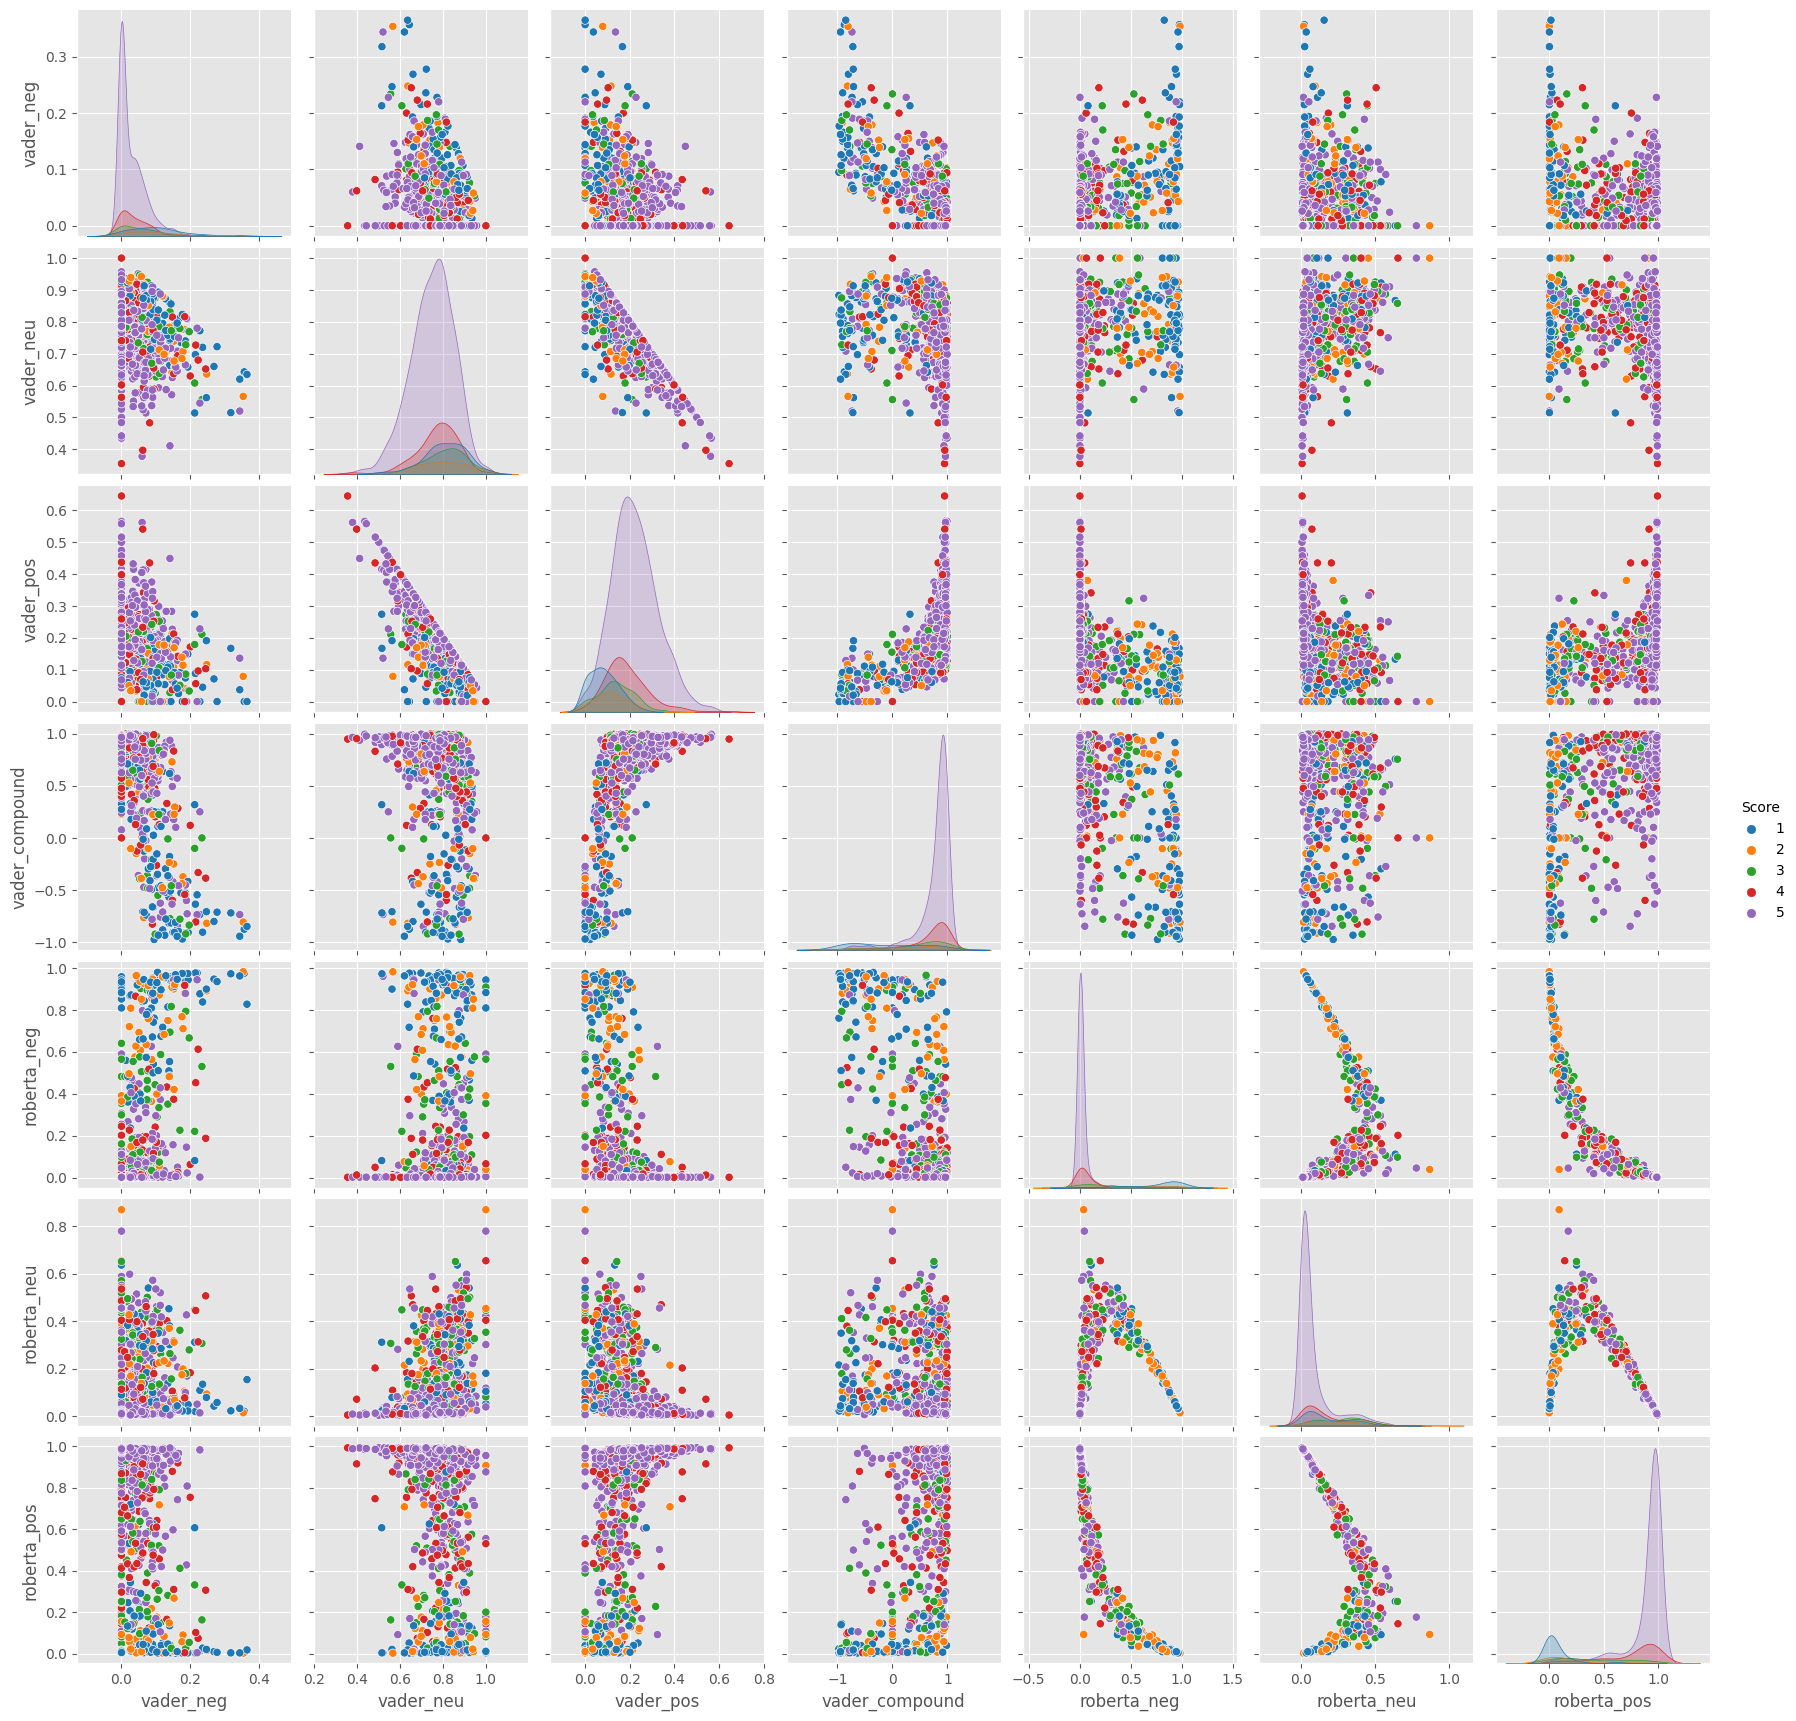

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
       hue='Score',
       palette='tab10')
plt.show()

## 6.Review

In [ ]:
results_df.query('Score==1').sort_values('roberta_pos',ascending=False)['Text'].values[0] #Highest positive comment with rating 1 for roberta

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [ ]:
results_df.query('Score==1').sort_values('vader_pos',ascending=False)['Text'].values[0] #Highest positive comment with rating 1 for vader

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [ ]:
results_df.query('Score==5').sort_values('roberta_neg',ascending=False)['Text'].values[0] #Highest negative comment with rating 5 for roberta

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
results_df.query('Score==5').sort_values('vader_neg',ascending=False)['Text'].values[0] #Highest negative comment with rating 5 for vader

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## 7.Transformers Pipeline

In [ ]:
from transformers import pipeline
sent_pipeline=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sent_pipeline("You need to stop cooking. Pack your bags and leave. Cause you should be working in the finest retaurant in the world.Any world where I dont live in ")

[{'label': 'POSITIVE', 'score': 0.9972457885742188}]